<a href="https://colab.research.google.com/github/adityamishra5050/Mobile-Price-Classification/blob/main/MLB_Assignment_1_M20MA201_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
Files=files.upload()

Saving train.csv to train.csv


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
Data = pd.read_csv('train.csv')

In [ ]:
Data.shape

(2000, 21)

In [ ]:
Data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
Data['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_auc_score

In [ ]:
Data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
x=Data.drop('price_range',axis=1)
y=Data['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**1) Applying Logistic Regression**

In [ ]:
lr = LogisticRegression()

results = lr.fit(x_train,y_train)

predLReg = lr.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()

crLReg



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.802817,0.754967,0.778157,151.000
1,0.517483,0.506849,0.512111,146.000
2,0.512987,0.533784,0.523179,148.000
3,0.708075,0.735484,0.721519,155.000
accuracy,0.635000,0.635000,0.635000,0.635
macro avg,0.635340,0.632771,0.633741,600.000
weighted avg,0.637419,0.635000,0.635893,600.000


In [ ]:
acc_log_train = round(lr.score(x_train, y_train)*100,2)
acc_log_test = round(lr.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 64.0
Testing Accuracy: % 63.5


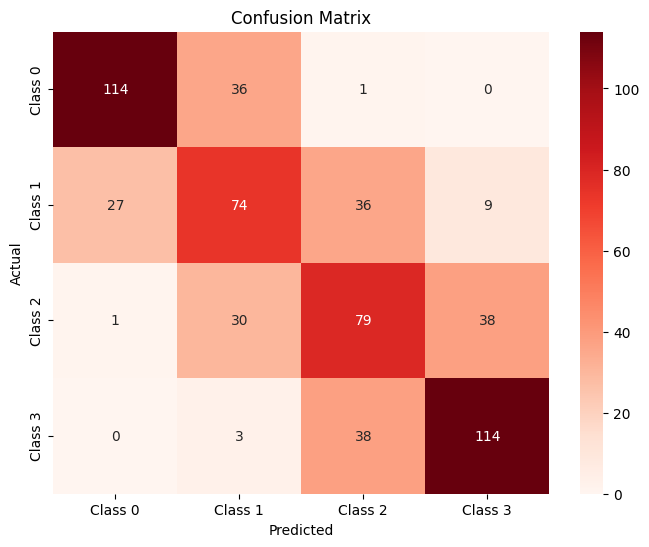

In [ ]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, predLReg)

# Define class labels (e.g., if it's binary classification)
class_labels = ['Class 0', 'Class 1','Class 2','Class 3']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Reds",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Get the feature coefficients
feature_importance = lr.coef_[0]

# Create a DataFrame to associate feature names with their coefficients
coefficients_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': feature_importance})

# Sort the DataFrame by coefficient magnitude (absolute value) to identify important features
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top N important features
top_n = 10
print(coefficients_df.head(top_n))


       Feature  Coefficient  Abs_Coefficient
8    mobile_wt     0.056074         0.056074
6   int_memory     0.018927         0.018927
14        sc_h     0.009209         0.009209
16   talk_time     0.007253         0.007253
10          pc     0.006710         0.006710
13         ram    -0.004923         0.004923
15        sc_w     0.004030         0.004030
9      n_cores     0.003598         0.003598
11   px_height    -0.002409         0.002409
4           fc     0.002093         0.002093


<ipython-input-59-44895dce2dc3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


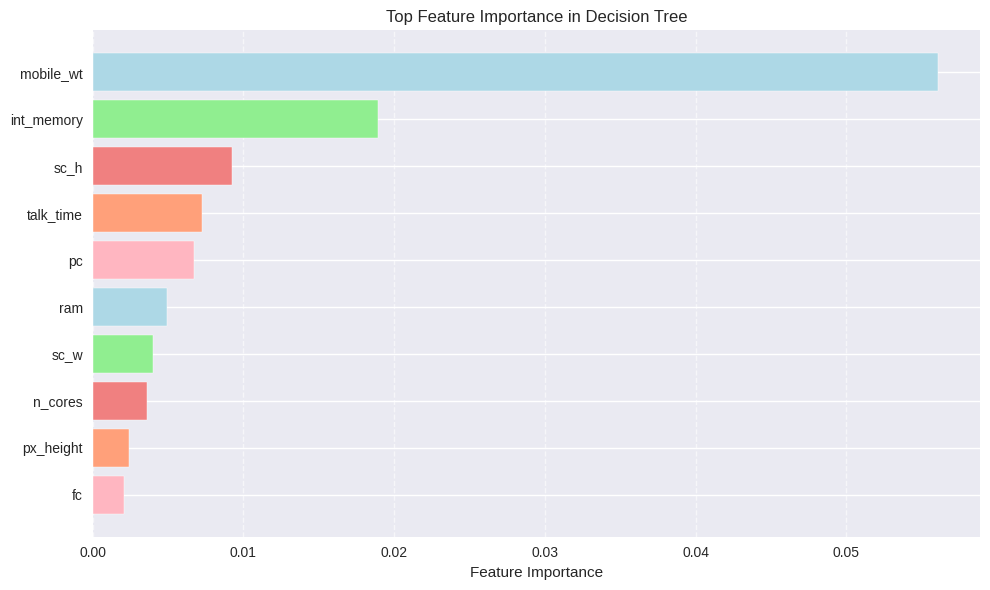

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style of the plot
plt.style.use('seaborn')

# Sort the DataFrame by importance in ascending order to show the most important features at the top
importance_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Create a list of custom colors for the bars
custom_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart with custom colors
bars = ax.barh(coefficients_df['Feature'][:top_n], coefficients_df['Abs_Coefficient'][:top_n], color=custom_colors)

# Add labels and title
ax.set_xlabel('Feature Importance')
ax.set_title('Top Feature Importance in Logistic Regression')

# Invert the y-axis to show the most important features at the top
ax.invert_yaxis()

ax.grid(axis='x', linestyle='--', alpha=0.6)

# Tighten the layout for a cleaner appearance
plt.tight_layout()

# Display the plot
plt.show()


**2) Applying Decission Tree**

In [ ]:
dt=DecisionTreeClassifier(random_state = 42)

dt.fit(x_train,y_train)

predDTC = dt.predict(x_test)
predtrain = dt.predict(x_train)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()

crDTC

,precision,recall,f1-score,support
0,0.909722,0.867550,0.888136,151.000000
1,0.742138,0.808219,0.773770,146.000000
2,0.751724,0.736486,0.744027,148.000000
3,0.875000,0.858065,0.866450,155.000000
accuracy,0.818333,0.818333,0.818333,0.818333
macro avg,0.819646,0.817580,0.818096,600.000000
weighted avg,0.821001,0.818333,0.819158,600.000000


In [ ]:
acc_log_train = round(dt.score(x_train, y_train)*100,2)
acc_log_test = round(dt.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 100.0
Testing Accuracy: % 81.83


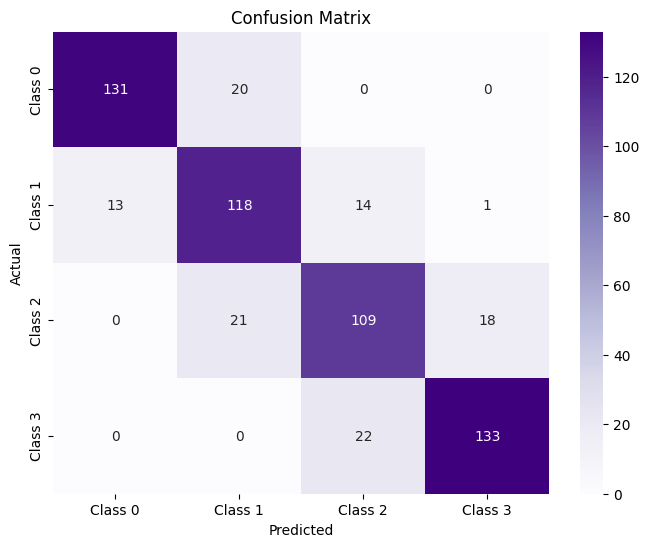

In [ ]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, predDTC)

# Define class labels (e.g., if it's binary classification)
class_labels = ['Class 0', 'Class 1','Class 2','Class 3']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Decision Tree Classifier Accuracy: ", dt.score(x_test,y_test))

Decision Tree Classifier Accuracy:  0.8183333333333334


In [ ]:
# Get feature importances
feature_importance = dt.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance to identify important features
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features
top_n = 10
print(importance_df.head(top_n))



          Feature  Importance
13            ram    0.620447
0   battery_power    0.135470
11      px_height    0.093714
12       px_width    0.078303
8       mobile_wt    0.013615
2     clock_speed    0.011501
16      talk_time    0.009720
10             pc    0.009205
4              fc    0.007990
15           sc_w    0.005278


<ipython-input-43-714df6ba90d1>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


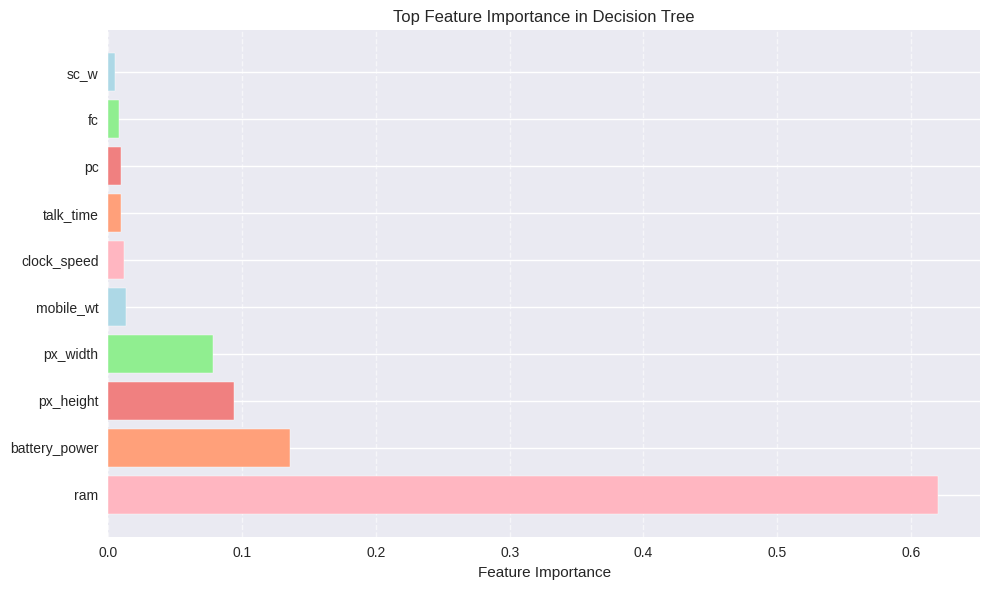

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style of the plot
plt.style.use('seaborn')

# Sort the DataFrame by importance in ascending order to show the most important features at the top
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create a list of custom colors for the bars
custom_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart with custom colors
bars = ax.barh(importance_df['Feature'][-top_n:], importance_df['Importance'][-top_n:], color=custom_colors)

# Add labels and title
ax.set_xlabel('Feature Importance')
ax.set_title('Top Feature Importance in Decision Tree')

# Invert the y-axis to show the most important features at the top
ax.invert_yaxis()

ax.grid(axis='x', linestyle='--', alpha=0.6)

# Tighten the layout for a cleaner appearance
plt.tight_layout()

# Display the plot
plt.show()


**3) Applying Random Forest**

In [ ]:
RFC = RandomForestClassifier(random_state=42,n_estimators=210)

RFC.fit(x_train,y_train)

predRFC = RFC.predict(x_test)
predtrainrfc = dt.predict(x_train)

reportRFC = classification_report(y_test,predRFC,output_dict = True)

crRFC = pd.DataFrame(reportRFC).transpose()

crRFC

,precision,recall,f1-score,support
0,0.929032,0.953642,0.941176,151.00
1,0.834483,0.828767,0.831615,146.00
2,0.805556,0.783784,0.794521,148.00
3,0.903846,0.909677,0.906752,155.00
accuracy,0.870000,0.870000,0.870000,0.87
macro avg,0.868229,0.868968,0.868516,600.00
weighted avg,0.869061,0.870000,0.869449,600.00


In [ ]:
print("Train Set Accuracy:"+str(accuracy_score(predtrainrfc,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(predRFC,y_test)*100))

Train Set Accuracy:100.0
Test Set Accuracy:87.0


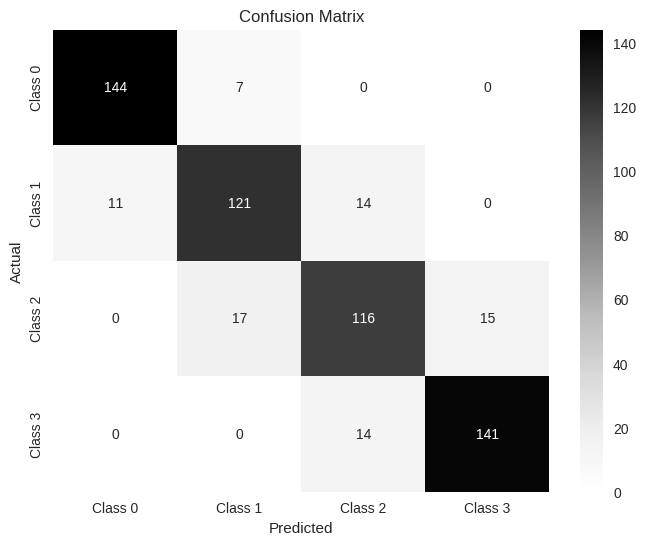

In [ ]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, predRFC)

# Define class labels (e.g., if it's binary classification)
class_labels = ['Class 0', 'Class 1','Class 2','Class 3']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greys",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get feature importances
feature_importance = RFC.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance to identify important features
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features
top_n = 10
print(importance_df.head(top_n))


          Feature  Importance
13            ram    0.471746
0   battery_power    0.074475
12       px_width    0.057549
11      px_height    0.056338
8       mobile_wt    0.039526
6      int_memory    0.039010
16      talk_time    0.030394
10             pc    0.030357
2     clock_speed    0.029075
15           sc_w    0.028813


<ipython-input-62-f9f89944e5ab>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


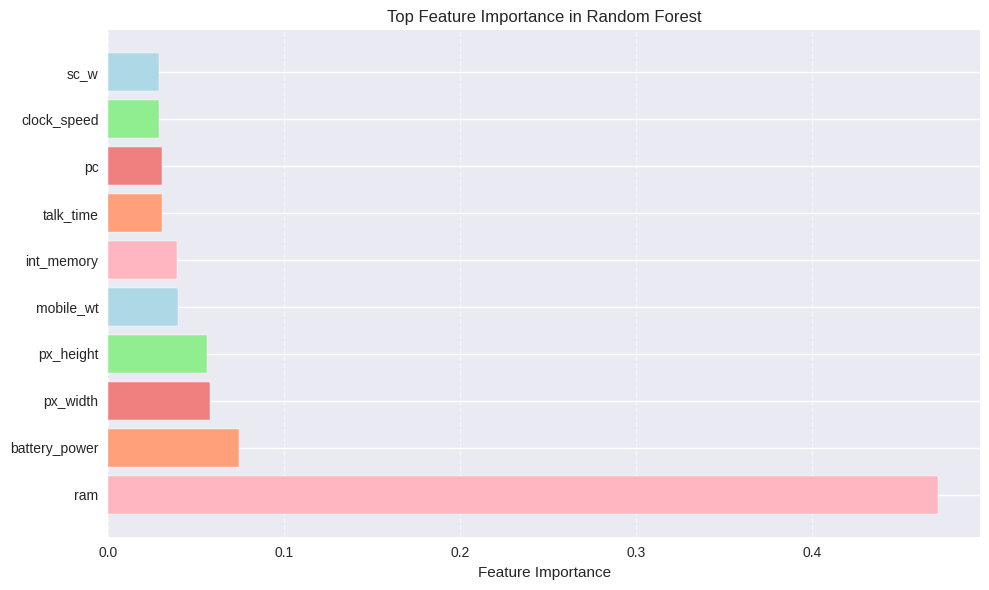

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style of the plot
plt.style.use('seaborn')

# Sort the DataFrame by importance in ascending order to show the most important features at the top
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create a list of custom colors for the bars
custom_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart with custom colors
bars = ax.barh(importance_df['Feature'][-top_n:], importance_df['Importance'][-top_n:], color=custom_colors)

# Add labels and title
ax.set_xlabel('Feature Importance')
ax.set_title('Top Feature Importance in Random Forest')

# Invert the y-axis to show the most important features at the top
ax.invert_yaxis()

ax.grid(axis='x', linestyle='--', alpha=0.6)

# Tighten the layout for a cleaner appearance
plt.tight_layout()

# Display the plot
plt.show()
